In [1]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import cv2
from SinGAN.functions import read_image
from SinGAN.functions import adjust_scales2image
from SinGAN.functions import torch2uint8
from SinGAN.functions import creat_reals_pyramid
from SinGAN.imresize import  imresize

from argparse import Namespace

%matplotlib notebook

In [2]:
imgs_dir = os.path.abspath('Input/People')
assert os.path.exists(imgs_dir)

In [3]:
# Load an color image in grayscale
img_path = os.path.join(imgs_dir, 'nature4.jpg')
assert os.path.exists(img_path)

In [4]:
real_ = cv2.imread(img_path)

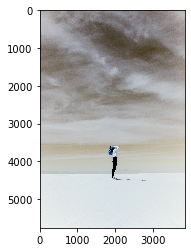

In [5]:
fig, ax = plt.subplots()
ax = plt.imshow(real_)
plt.show()

In [6]:
real_[3560:4490,1800:2180,:]  = 0
real2_ = real_.copy()
real2_[3560:4490,1800:2180,:] = real_[3560:4490,1800-(2180-1800):1800,:]

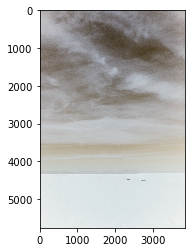

In [7]:
fig, ax = plt.subplots()
ax = plt.imshow(real2_)
plt.show()

In [8]:
cv2.imwrite('Input/Paint/nature4_mask.jpg',real2_)

True

In [53]:
opt = Namespace(input_dir='Input/People', input_name='nature4.jpg', nc_im=3,
                cuda=0, max_size=256, min_size=25, scale_factor_init=0.75, not_cuda=True)
opt

Namespace(cuda=0, input_dir='Input/People', input_name='nature4.jpg', max_size=256, min_size=25, nc_im=3, not_cuda=True, scale_factor_init=0.75)

In [54]:
real_ = read_image(opt)
real_[:,:,3560:4490,1800:2180] = 0
adjust_scales2image(real_, opt)
in_s      = 0
scale_num = 0

real = imresize(real_,opt.scale1,opt)
reals = []
reals = creat_reals_pyramid(real,reals,opt)

In [55]:
def plot_imgs(reals):
    fig = plt.figure(figsize=(8,8))
    h = 3
    w = 3
    print(len(reals))
    for i in range(1,len(reals)):
        im = torch2uint8(reals[i-1])
        ax = fig.add_subplot(h,w,i)
        ax = plt.imshow(im)
    plt.show()

<IPython.core.display.Javascript object>


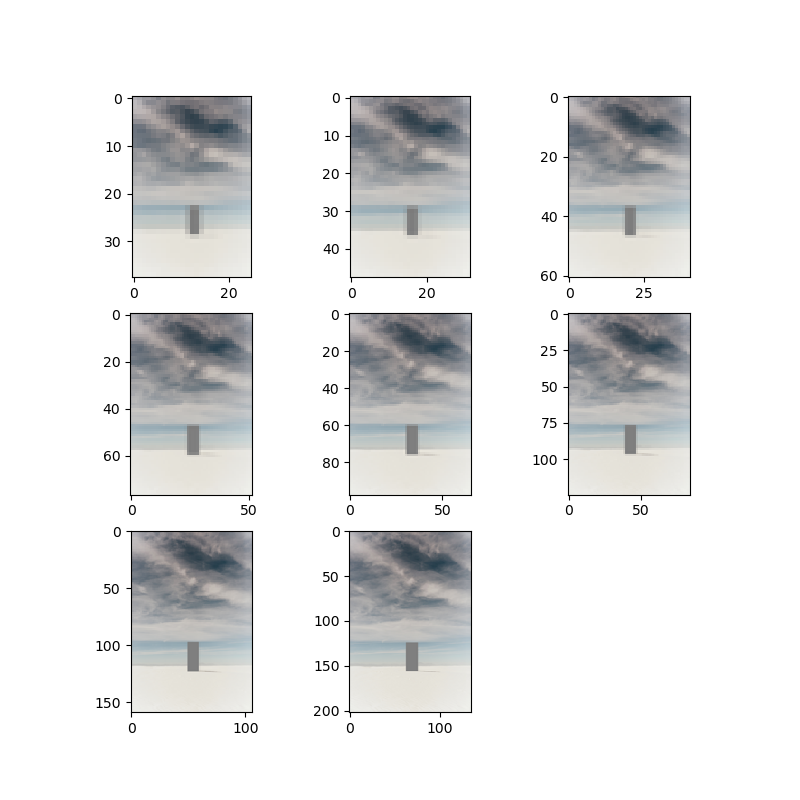

9


In [56]:
plot_imgs(reals)

In [63]:
from pprint import pprint
pprint([r.shape for r in reals])

[torch.Size([1, 3, 38, 25]),
 torch.Size([1, 3, 48, 32]),
 torch.Size([1, 3, 61, 41]),
 torch.Size([1, 3, 77, 52]),
 torch.Size([1, 3, 98, 66]),
 torch.Size([1, 3, 125, 84]),
 torch.Size([1, 3, 159, 106]),
 torch.Size([1, 3, 202, 135]),
 torch.Size([1, 3, 256, 171])]
